# Training computers to smell: how machine learning and chemical engineering can be used in the fragrance industry."
> "Cheminformatics"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [SQL, business]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

## 1) Historic perpective.

Our olfactory system have a remarkable capacity to distinguish [about 1 trillion smells](https://science.sciencemag.org/content/343/6177/1370) :scream:! . We are usually not thankful for that, but mother nature have given us an enormous gift. It is a product of hundreds of thousands of years of evolution that helped us to survive in less prosper times. It has helped us to find good food, and avoid dangerous situations.

However, the modern human badly rely on their nose for the purpose of nutrition. When we go to a market we dont need to smell or taste the food to gather information about it. All information we need are written the plastic packing which envolve the food we buy: calories, fat, sugar, expiration date. 

:interrobang:  **So what is the role of our nose for the modern human?** **Is It just for us to lay our glasses on? Or hang piercings? Or for us to complain about its irregular shape when taking selfies?**  
You may argue yourself that you could easily survive without your nose and our remaining senses are much more important (vision, hearing, tasting), and I can't disagree. 

It seems that we do not need our nose for surviviness nowadays, but good smells can have a **huge influence** on our behavior and companies take **real** advantage of that when trying to sell you things :moneybag:. Consider a simple product which is an essential part our daily life (now even more during covid pandemic): **soup**. There are hundreds of soap brands in a regular market. They all do the cleaning job pretty well. You may have tested a lot of them and I'm pretty sure you finished washing your hands and did not complained about the soap capacity to remove dirty. So what do guide your decision when you buy a soap and other self-care products? 

I cant avoid sharing my experience: I always smell the soap before buying it and I always choose the one with the most pleasant smell :smile:. It is one only products in the market you can experience before buying and a lot of people take advantage of that. The same is valid for shampoos, deodorants, cosmetics and so on.

The products I mentioned are part of what people call fragranced functional products. They serve a given purpose (cleaning for shampoos) but contain frangances to either improve customer acceptance or mask an unpleasant odors. There are also another class of frangraced products: **Perfumes!**

Unlike shampoos, perfumes have no other purpose than be perceived. The word perfume comes from the Latin phrase, “per” meaning “thorough” and “fumus” meaning “smoke”. The French later gave the name “parfum” to the smells produced by burning incense. Some perfumes are made to be  released in the air and give a confined space a certain olfactory "personality". Similarly, perfumes are also used by humans to give themselfs olfactory personality - **with frangances!**


I have already seen very expensive fragrances in a mall and I always asked myself how can people pay so much just to have that mixture of molecules being released from their skin? The fact is that people are willing to pay hundreds of dollars for a bottle of a perfume which make the flavor and fragance a [multibilion-dollar business](https://blog.technavio.com/blog/top-10-flavors-and-fragrances-companies-world) :money_with_wings: (nothing bad for our apparent useless nose). 

 

## 2) Chemistry and biology of smelling

I have been thinking and working with all that stuff in the past year (I will detail it later), but only **recently** I have asked my self: **what makes a molecule to have a bad or a good smell or to be odorless instead?**

The first thing we should consider is how do we smell. Here I will provide a simplified explanation of it.

The sense of smelling is built by a cooperation between of our nose and our brain. When a chemical component is present in the air and we sniff it, the chemical travel through our nostrils and reach our nervous cells. If we are sensitive to that chemical and it is present in a detectable amount, it will send an electrical signal through our neurons. That signal is then processed by our brain creating the conscious experience of smelling. Here is a picture I took from the web to summarize it.

![](images/sniff.jpg "Credit: https://qbi.uq.edu.au/blog/2018/11/how-do-we-smell-things#:~:text=Whenever%20we%20smell%20something%2C%20our,easier%20to%20smell%20a%20smell.")

Now we have a general understanding of how we smell. We can verify that our nose is only rensponsible for collecting molecules in the air, but the **actual experience of smelling happens in our brain.** 

It is a very interest finding, but it still does not answer the question "why certain molecules fire our brain and create a good, bad or even no experience?" 

Let's consider the two simple molecules: water and ethanol. Water is a odorless chemical (at least for me) while ethanol has a very unpleasant smell (at least for most people I know) even in small concentrations. The clues of why water is odorless and ethanol is not may be in their chemical structure. 

Let's check it out. :nerd_face:

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
Draw.IPythonConsole.ipython_3d = True

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

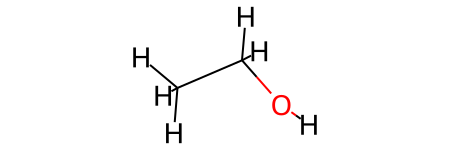

In [3]:
ethanol = Chem.MolFromSmiles('OCC')
ethanol2=Chem.AddHs(ethanol)
AllChem.EmbedMolecule(ethanol2)
ethanol2

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

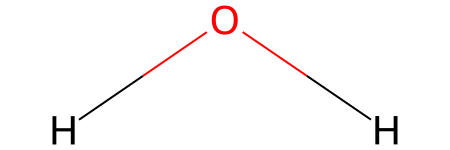

In [4]:
water = Chem.MolFromSmiles('O')
water =Chem.AddHs(water)
AllChem.EmbedMolecule(water)
water